In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import math

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(os.listdir('/content/drive/MyDrive/Datasets/chest_xray'))

['train', 'chest_xray', 'test', '__MACOSX', 'val']


In [4]:
# Importing datas
train_dir = "/content/drive/MyDrive/Datasets/chest_xray/train"
train_normal = len(os.listdir(os.path.join(train_dir, "NORMAL")))
train_pneumonia = len(os.listdir(os.path.join(train_dir, "PNEUMONIA")))

test_dir = "/content/drive/MyDrive/Datasets/chest_xray/test/"
test_normal = len(os.listdir(os.path.join(test_dir, "NORMAL")))
test_pneumonia = len(os.listdir(os.path.join(test_dir, "PNEUMONIA")))

val_dir = "/content/drive/MyDrive/Datasets/chest_xray/val"
val_normal = len(os.listdir(os.path.join(val_dir, "NORMAL")))
val_pneumonia = len(os.listdir(os.path.join(val_dir, "PNEUMONIA")))

In [5]:
# # Load one image from each category
# train_normal_image = Image.open(os.path.join(train_normal, os.listdir(train_normal_dir)[0]))
# train_pneumonia_image = Image.open(os.path.join(train_pneumonia, os.listdir(train_pneumonia_dir)[0]))

# # Plotting the normal image
# plt.figure(figsize=(5,5))
# plt.imshow(train_normal_image, cmap='gray')
# plt.title('Normal')

# # Plotting the pneumonia image
# plt.figure(figsize=(5,5))
# plt.imshow(train_pneumonia_image, cmap='gray')
# plt.title('Pneumonia')

# plt.show()


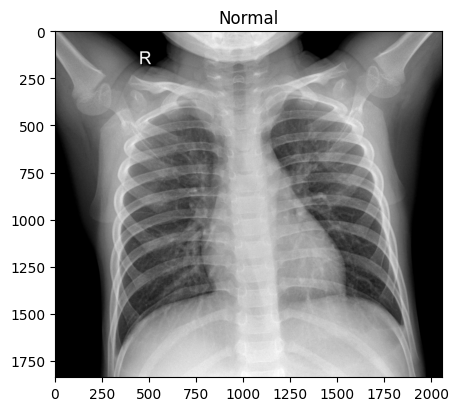

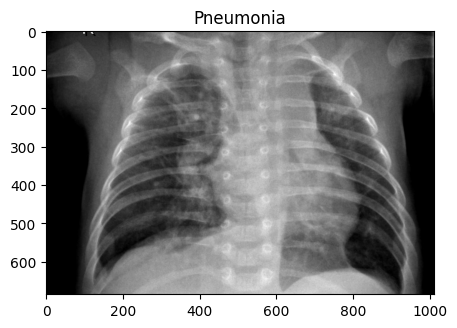

In [6]:
# Define the directories
train_dir = "/content/drive/MyDrive/Datasets/chest_xray/train"
train_normal_dir = os.path.join(train_dir, "NORMAL")
train_pneumonia_dir = os.path.join(train_dir, "PNEUMONIA")

# Load one image from each category
train_normal_image = Image.open(os.path.join(train_normal_dir, os.listdir(train_normal_dir)[0]))
train_pneumonia_image = Image.open(os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[0]))

# Plotting the normal image
plt.figure(figsize=(5,5))
plt.imshow(train_normal_image, cmap='gray')
plt.title('Normal')

# Plotting the pneumonia image
plt.figure(figsize=(5,5))
plt.imshow(train_pneumonia_image, cmap='gray')
plt.title('Pneumonia')

plt.show()


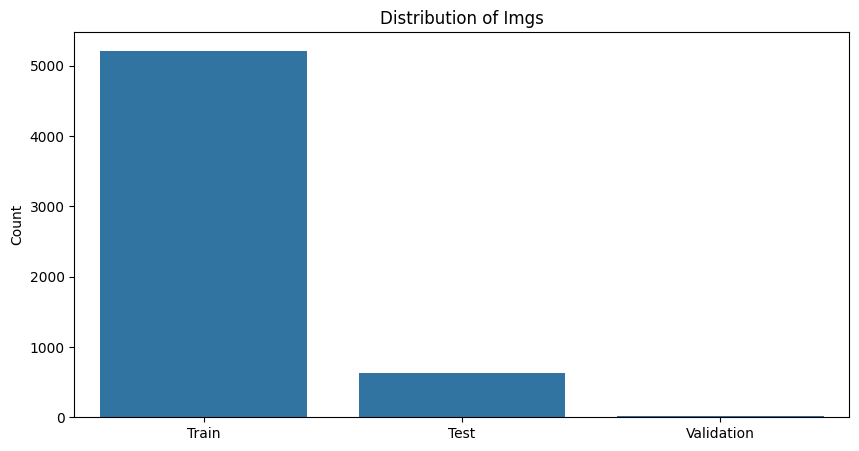

In [21]:
# Simple EDA
plt.figure(figsize=(10, 5))
sns.barplot(x=["Train", "Test", "Validation"], y=[train_normal + train_pneumonia, test_normal + test_pneumonia, val_normal + val_pneumonia])
plt.title("Distribution of Imgs")
plt.ylabel("Count")
plt.show()

In [8]:
# Data Augmentation

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [9]:
#CONSTs
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
# Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])



In [12]:
# Correctly calculate steps_per_epoch and validation_steps
steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/30
163/163 [==============================] - 542s 3s/step - loss: 0.5392 - accuracy: 0.7515 - val_loss: 1.2523 - val_accuracy: 0.5625
Epoch 2/30
163/163 [==============================] - 101s 619ms/step - loss: 0.3861 - accuracy: 0.8167 - val_loss: 0.5504 - val_accuracy: 0.7500
Epoch 3/30
163/163 [==============================] - 99s 607ms/step - loss: 0.3355 - accuracy: 0.8457 - val_loss: 0.9709 - val_accuracy: 0.6875
Epoch 4/30
163/163 [==============================] - 100s 614ms/step - loss: 0.3048 - accuracy: 0.8608 - val_loss: 0.5527 - val_accuracy: 0.7500
Epoch 5/30
163/163 [==============================] - 102s 624ms/step - loss: 0.2720 - accuracy: 0.8827 - val_loss: 0.5837 - val_accuracy: 0.7500
Epoch 6/30
163/163 [==============================] - 102s 621ms/step - loss: 0.2642 - accuracy: 0.8809 - val_loss: 0.6056 - val_accuracy: 0.8125
Epoch 7/30
163/163 [==============================] - 99s 608ms/step - loss: 0.2588 - accuracy: 0.8854 - val_loss: 1.1963 - val_

KeyboardInterrupt: 

In [13]:


# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // BATCH_SIZE
# )

In [14]:
# Results
test_results = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

19/19 [==============================] - 152s 8s/step - loss: 0.3000 - accuracy: 0.8668
Test Loss: 0.3000023365020752
Test Accuracy: 0.8667762875556946


In [15]:
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)

20/20 [==============================] - 7s 355ms/step


In [16]:
print(classification_report(test_generator.classes, y_pred, target_names=["Normal", "Pneumonia"]))
confusion_mtx = confusion_matrix(test_generator.classes, y_pred)



              precision    recall  f1-score   support

      Normal       0.37      0.38      0.38       234
   Pneumonia       0.62      0.60      0.61       390

    accuracy                           0.52       624
   macro avg       0.49      0.49      0.49       624
weighted avg       0.53      0.52      0.52       624



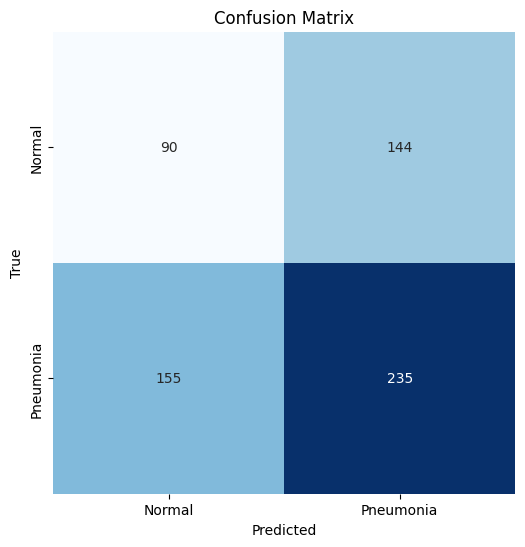

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from tensorflow.keras.models import load_model, save_model


# model.save('/content/drive/MyDrive/Datasets/chest_xray/Pneumonia_cnn_model.h5')
model.save('/content/drive/MyDrive/Datasets/chest_xray/my_model.keras')
print("Model saved successfully.")


Model saved successfully.
